In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [2]:
from psikit import Psikit

In [3]:
pk=Psikit(debug=True,threads=1,memory=12)


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


In [4]:
pk.read_from_smiles('Cn1cnc2c1c(=O)n(C)c(=O)n2C')

In [6]:
pk.optimize()

Optimizer: Optimization complete!


-676.3571174812205

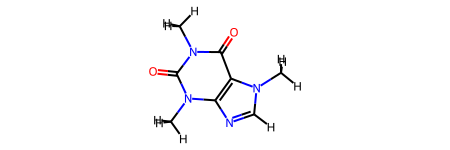

In [7]:
pk.mol

In [8]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.20810044  0.06752647  0.08393937 -0.4678519   0.12070466 -0.09084087
  0.35834311 -0.49495357 -0.04696844 -0.02877608  0.37000296 -0.53027865
  0.01788358  0.01153843  0.11234496  0.11234496  0.11234496  0.17379121
  0.06012362  0.06012362  0.06012362  0.04887814  0.04887814  0.04887814]
[-0.11403335 -0.69386538  0.3863824  -0.622823    0.63502241  0.09325515
  0.8998093  -0.6301339  -0.87906295 -0.12347214  1.09568168 -0.62726243
 -0.87748836 -0.12043535  0.16727004  0.12972955  0.1672723   0.18241302
  0.17514711  0.14565786  0.14558391  0.16748183  0.14852448  0.14934582]
[-0.13211899 -0.05264157  0.07837179 -0.27561799  0.14000265 -0.12526089
  0.2928532  -0.39405125 -0.18759178 -0.13842814  0.34796906 -0.39844421
 -0.15249004 -0.13201081  0.1167999   0.10376712  0.11774977  0.12082527
  0.12159868  0.10704078  0.10596548  0.11963406  0.1081228   0.10795512]


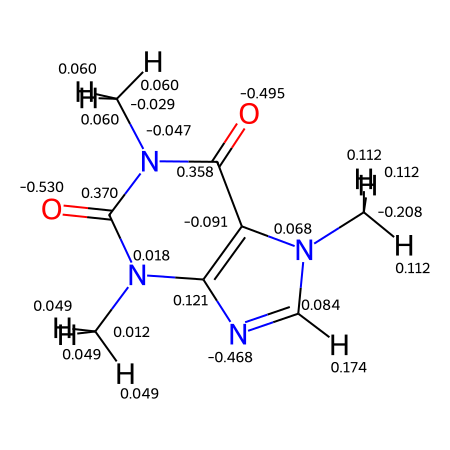

In [30]:
mol = pk.mol
atoms = mol.GetAtoms()

IPythonConsole.molSize = 450,450

for at in atoms:
    lbl = '%.3f'%(float(at.GetProp('RESP')))
    at.SetProp('atomNote',lbl)
mol

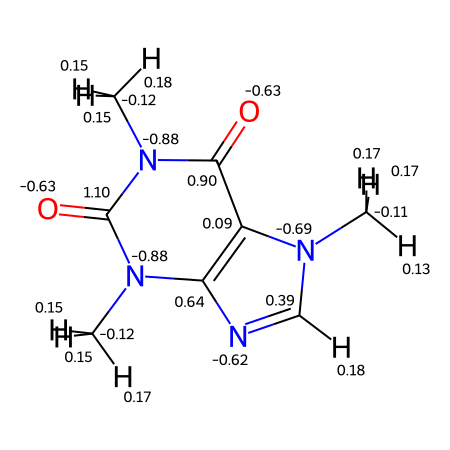

In [27]:
for at in atoms:
    lbl = '%.2f'%(float(at.GetProp('MULLIKEN')))
    at.SetProp('atomNote',lbl)
mol

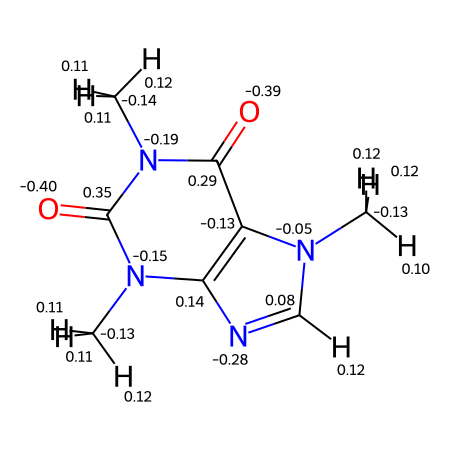

In [29]:
for at in atoms:
    lbl = '%.2f'%(float(at.GetProp('LOWDIN')))
    at.SetProp('atomNote',lbl)
mol

In [10]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [11]:
df = pd.DataFrame(data)

In [12]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.208,-0.114,-0.132
1,N,0.068,-0.694,-0.053
2,C,0.084,0.386,0.078
3,N,-0.468,-0.623,-0.276
4,C,0.121,0.635,0.140
5,C,-0.091,0.093,-0.125
6,C,0.358,0.900,0.293
7,O,-0.495,-0.630,-0.394
8,N,-0.047,-0.879,-0.188
9,C,-0.029,-0.123,-0.138


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
plt.style.use('ggplot')

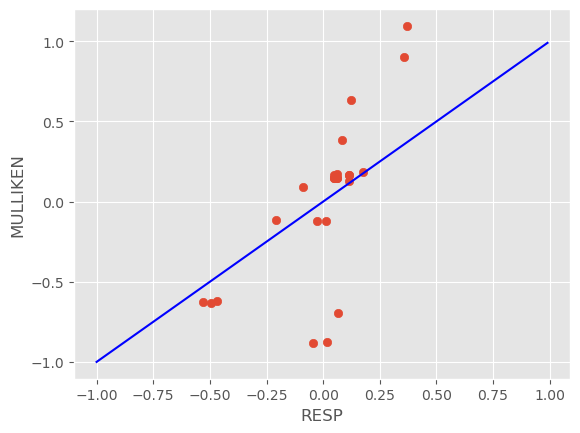

In [15]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

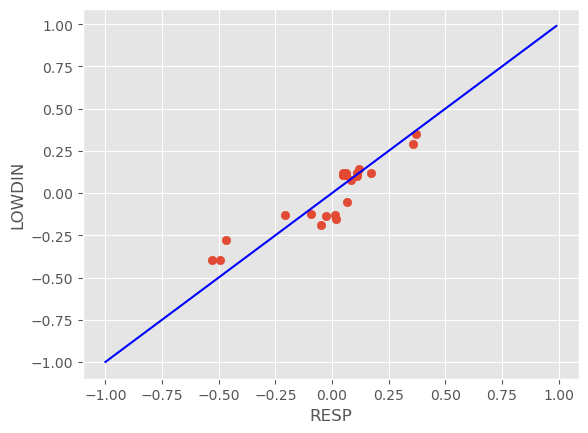

In [16]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

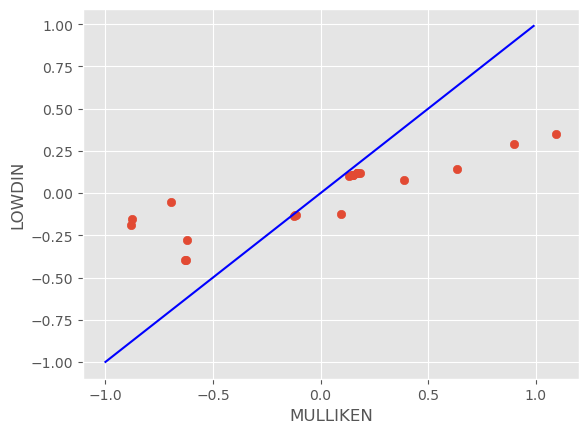

In [17]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')